# Day-3 Use Case : Predicting Crime rate.

In [72]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_validate
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df=pd.read_excel('Crime.xlsx')

### Data Exploration

In [74]:
df.info() # All are continous variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
X1    50 non-null int64
X2    50 non-null int64
X3    50 non-null int64
X4    50 non-null int64
X5    50 non-null int64
X6    50 non-null int64
X7    50 non-null int64
dtypes: int64(7)
memory usage: 2.8 KB


In [75]:
df.describe() # Nothing abnormal to be found

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


In [76]:
df.isna().sum()  # No Missing Values

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

In [77]:
x=df[df.columns[1:7]]
y=df[df.columns[0]]

In [78]:
df.columns[1:7]

Index(['X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [79]:
x.sample(10)

,X2,X3,X4,X5,X6,X7
20,608,33,46,22,24,8
8,38,36,69,7,25,12
43,433,43,48,26,23,12
2,347,57,70,18,16,16
9,226,31,66,9,58,15
48,1022,82,72,22,15,16
49,1244,66,67,26,18,16
29,216,36,43,18,23,8
19,98,23,56,15,50,15
25,693,35,57,9,60,18


### Model Preparation

In [97]:
def testmodel(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred_test=regr.predict(x_test)
    print("Root Mean squared error: %.4f"% sqrt(mean_squared_error(y_test,y_pred_test)))
    print('R2 score: %.4f' % r2_score(y_test, y_pred_test))
    plt.scatter(y_test,y_pred_test)


Root Mean squared error: 169.7250
R2 score: -0.5133


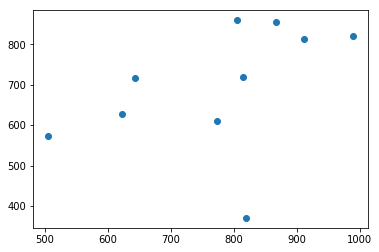

In [98]:
testmodel(x,y)                                  # Base model with all the variables.

##### Identifying Important Features

In [99]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


##### here X2,X3,X5,X6,X4,X7 are the order of importance of variables.

Root Mean squared error: 169.7250
R2 score: -0.5133


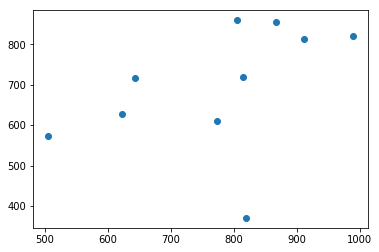

In [100]:
testmodel(x[['X2','X3','X5','X6','X4','X7']],y)           # Base Model

Root Mean squared error: 127.5529
R2 score: 0.1453


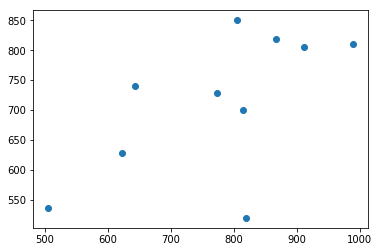

In [101]:
testmodel(x[['X2','X3','X5','X6','X4']],y)               # Model without X7

Root Mean squared error: 127.7484
R2 score: 0.1427


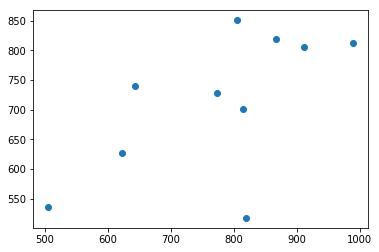

In [102]:
testmodel(x[['X2','X3','X5','X6']],y)                   # Model without X4

#### Identifying Outliers and removing them from Data.

(array([10., 12.,  7., 12.,  5.,  0.,  0.,  2.,  1.,  1.]),
 array([ 341. ,  480.9,  620.8,  760.7,  900.6, 1040.5, 1180.4, 1320.3,
        1460.2, 1600.1, 1740. ]),
 <a list of 10 Patch objects>)

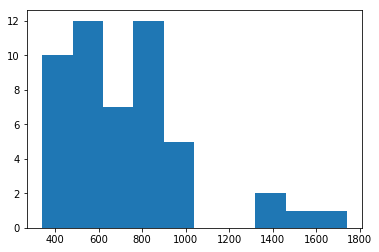

In [103]:
y_new=np.array(y)
plt.hist(y)

Root Mean squared error: 256.5802
R2 score: 0.1581


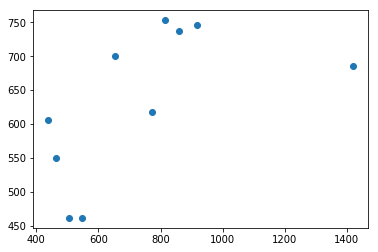

In [104]:
df_rm=df[df['X1']<(np.mean(y_new)+3*np.std(y_new))]
x_rm=df_rm[df_rm.columns[1:7]]
y_rm=df_rm[df_rm.columns[0]]
testmodel(x_rm[['X2','X3','X5','X6']],y_rm)

#### Cross Validating the Dataset.

In [105]:
regr=linear_model.LinearRegression()
scores = cross_validate(regr, x_rm, y_rm,cv=10, scoring=['neg_mean_squared_error','r2'],)
print(sqrt(-scores['test_neg_mean_squared_error'].mean()))
print(scores['test_r2'].mean())


215.28213995577553
-2.431384329071694
